# Linear Regression

La **regressione lineare** è un approccio che cerca di trovare una **relazione lineare** tra una **variabile dipendente** e una **variabile indipendente** riducendo al minimo la distanza come mostrato di seguito.

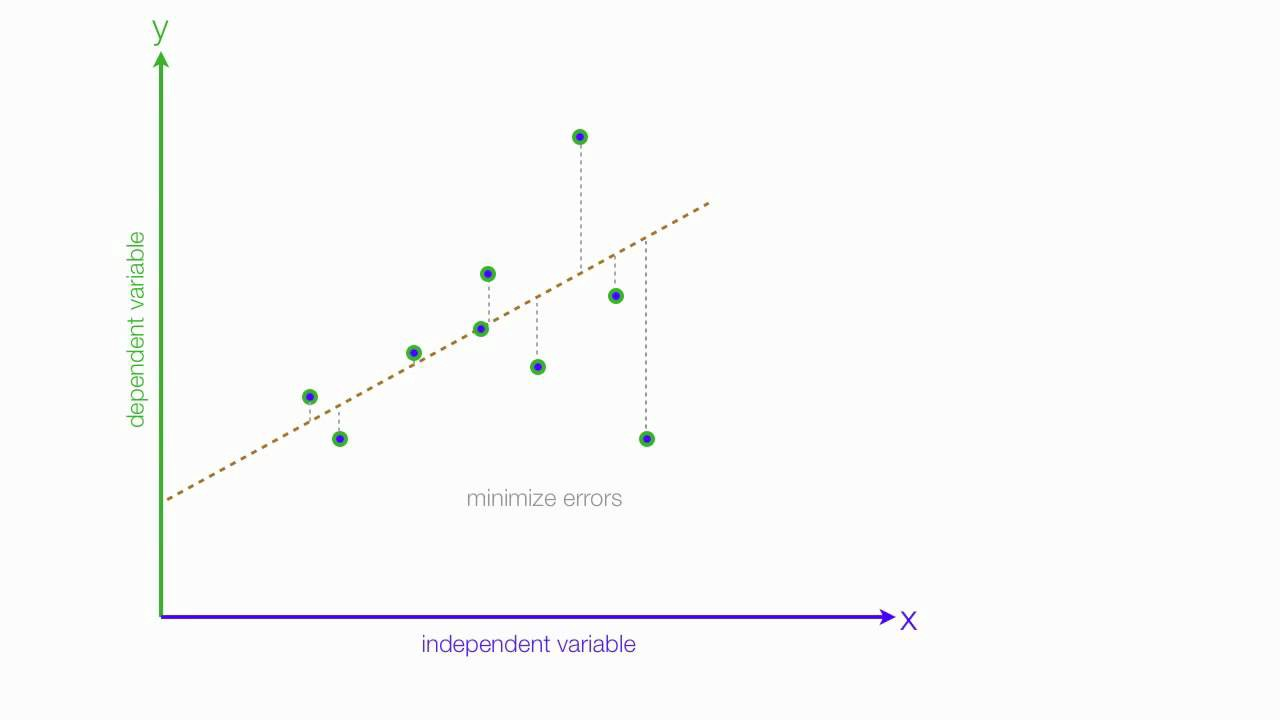

In [322]:
from IPython.display import Image 
Image(filename = "images\LinearRegr.jpeg", width=656, height=918)

Una relazione è di tipo **lineare** se, rappresentata su assi cartesiane, si avvicina alla forma di una retta. Ovvero può essere espressa con una equazione tipo y = ax + b

Una variabile è **indipendente** se non dipende da nessuna variabile (ad esempio x) mentre è **dipendente** se dipende da una o più variabili. Ad esempio nella equazione y = ax + b, x è una variabile indipendente mentre y è dipendente da x

In statistica la **regressione lineare** rappresenta un metodo di stima del valore atteso condizionato di una variabile dipendente Y, dati i valori di altre variabili indipendenti X1...Xk

## Matematica

Appunti presi da : https://donaldpinckney.com/books/pytorch/book/ch2-linreg/2017-12-03-single-variable.html

Per i problemi di regressione, l'obiettivo è prevedere un output variabile continuo, date alcune variabili di input (chiamate anche features). 
Per la regressione a variabile singola, abbiamo solo la variabile di input x e il nostro output desiderato y. 
Il nostro set di dati D ha quindi questa forma:

$D=\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)})\}$

dove m è il numero di esempi nel set di dati. Si noti che i numeri sono tra parentesi per indicare che non sono elevazioni ma indici.

Quindi, come possiamo modellare matematicamente la regressione lineare singola? Poiché l'obiettivo è trovare la linea perfetta, iniziamo definendo il modello (la descrizione matematica di come verranno create le previsioni) come una linea:

$y'(x,a,b) = ax+b$

dove x è l'input, y' è la previsione per l'input x, a e b sono parametri del modello . 

Ora il problema diventa come possiamo trovare i migliori valori di a e b in modo che le previsioni y' siano quanto più possibili ai valori reali y ?

Il primo passo è definire una funzione di perdita (chiamata anche funzione di costo), che misura quanto sia cattiva una particolare scelta di una coppia di valori a e b. 
Valori di a e B che sembrano scadenti (una linea che non si adatta al set di dati) dovrebbe portare a un valore grande della funzione di perdita, mentre buoni valori (una linea che si adatta bene al set di dati) dovrebbe portare a valori piccoli della funzione di perdita. 
In altre parole, la funzione di perdita dovrebbe misurare la distanza della linea prevista da ciascuno dei punti dati e sommare questo valore per tutti i punti dati. 

Possiamo scrivere questo come:

$L(a,b)= \sum \limits _{i=1} ^{m} (y'(x^{(i)},a,b)−y^{(i)})^2$

Ricordiamo che ci sono m esempi nel set di dati e che $x^{(i)}$ è l'iesimo input.
La quadratura è importante perchè permette all'errore di essere sempre positivo. 
Per questo motivo, il modello è anche chiamato regressione dei minimi quadrati (least squares regression).

Unendo le ultime due equazioni abbiamo :
    
$L(a,b)= \sum \limits _{i=1} ^{m} (ax^{(i)} + b - y^{(i)})^2$

se dovessimo fare un grafico di questa funzione otterremmo    

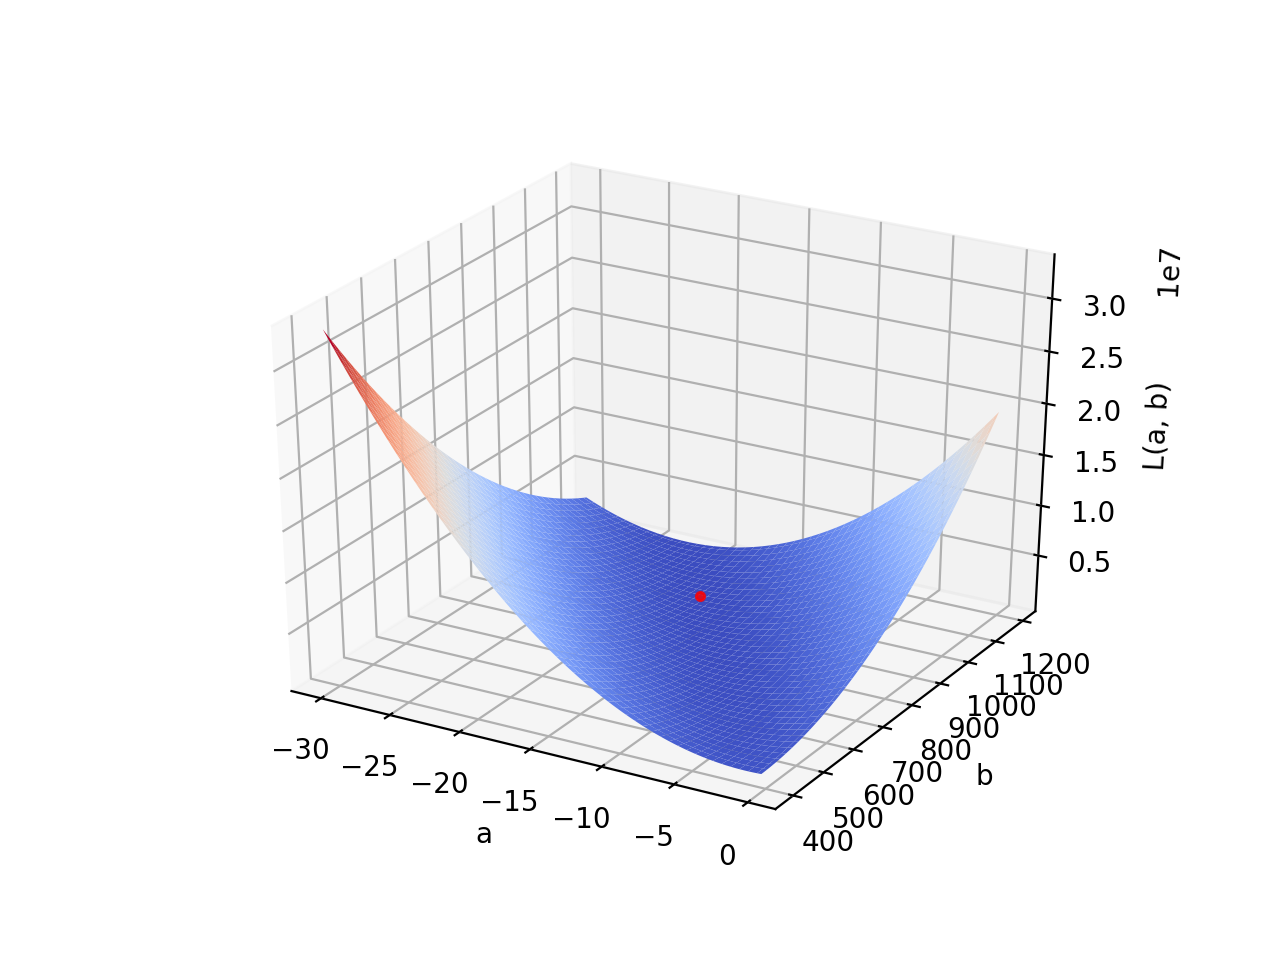

In [594]:
Image(filename = "images\minimum.png", width=656, height=918)

Questo grafico rappresenta l'errore di tutti i valori di a e di b usando l'ultima formula.
Dato che noi vogliamo minimizzare l'errore ci serve trovare il punto mi minimo.
Abbiamo bisogno di un algoritmo per trovare questo minimo. 
Dal grafico intuiamo che il punto di minimo è un punto completamente piatto, che corrisponde a trovare il punto di 0 delle derivate :

$\Large \frac{∂L}{∂a} = \sum \limits _{i=1} ^{m} 2(ax^{(i)} + b - y^{(i)})x^{(i)}$ <br>
$\Large \frac{∂L}{∂b} = \sum \limits _{i=1} ^{m} 2(ax^{(i)} + b - y^{(i)})$

Per determinare i valori di a e b che avvicinano il più possibile queste derivate a 0 si sua un algoritmo chiamato discesa del gradiente.

Immaginiamo di posizionare una palla in una posizione arbitraria sulla superficie di L, naturalmente rotolerà in discesa verso il punto più piano della valle sottostante. Questo punto più piano sarà il minimo. <br>
Matematicamente possiamo 'simulare' questa discesa sulla superfice di L usando le due derivate di sopra.
In matematica, le derivate sono il coefficiente angolare della retta tangente alla curva nel punto, o più facilmente ci dice la pendenza della salita della funzione in quel punto.
Dato che a noi serve la pendenza di discesa basta rendere negativo il risultato delle derivate.

Quindi conosciamo la direzione della "discesa" in qualsiasi luogo poiché conosciamo le derivate di L. 
Pertanto, se la palla è attualmente nella posizione $(a,b)$, possiamo calcolare lo spostamento nella prossima posizione $(a',b')$ con le formule:

$\Large a'= a - α\frac{∂L}{∂a}$ <br>
$\Large b'= b - α\frac{∂L}{∂b}$

dove **α** è una costante chiamata **tasso di apprendimento** , di cui parleremo più avanti. <br> 
Unendo le formule otteniamo che i nuovi valori a' e b' si calcolano con le formule :

$\Large a'= a - α\sum \limits _{i=1} ^{m} 2(ax^{(i)} + b - y^{(i)})x^{(i)}$ <br>
$\Large b'= b - α\sum \limits _{i=1} ^{m} 2(ax^{(i)} + b - y^{(i)})$

Se ripetiamo questo processo, la palla continuerà a rotolare in discesa fino al minimo. Un'animazione di questo processo assomiglia a:

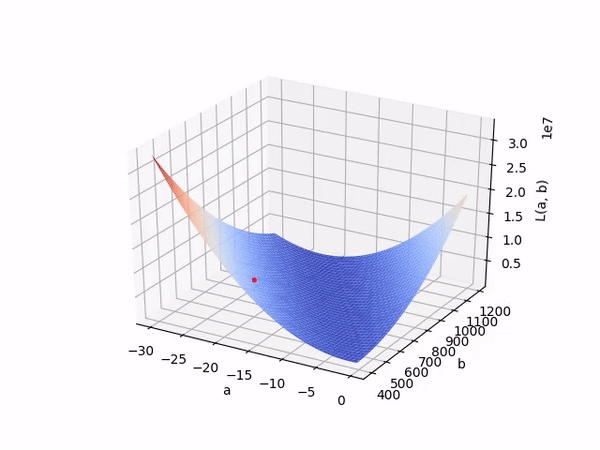

In [595]:
Image(filename = "images\descent_fast.gif", width=656, height=918)

Eseguendo l'algoritmo di discesa del gradiente abbastanza a lungo, trovemo la posizione ottimale per (a,b). 
Una volta ottenuti i valori ottimali di a e b, abbiamo allenato la nostra rete neurale e possiamo usarla per prevedere risultati su dati che la rete non ha mai visto.

## PyTorch

Ora vediamo come implementare una rete neurale con PyTorch che calcola una semplice regressione lineare

Consideriamo un'equazione lineare molto semplice, cioè **y=2x+1**. Qui, "x" è la variabile indipendente e y è la variabile dipendente. Useremo questa equazione per creare un set di dati fittizio che verrà utilizzato per addestrare questo modello di regressione lineare.

Di seguito è riportato il codice per la creazione del set di dati.

In [323]:
import numpy as np  #import di numpy

# inizializzo il seed del random
np.random.seed(42)

# create dummy data for training
#x_values = [i for i in range(11)] # creiamo i valori di x come range tra 1 e 10 , valori senza rumore
x_values = np.random.rand(30, 1)*10.0  # creo i valori con rumore
x_train = np.array(x_values, dtype=np.float32).reshape(-1, 1) # trasformiamo in un numpy array e mettiamo in colonna

#y_values = [2*i + 1 for i in x_values] # calcoliamo i valori della funzione y=2x+1 per i valori di x , valori senza rumore
y_values = [2*i + 1 for i in x_values] + np.random.randn(30, 1) * 0.5 # calcoliamo i valori con rumore
y_train = np.array(y_values, dtype=np.float32).reshape(-1, 1) # trasformiamo in un numpy array e mettiamo in colonna

Una volta creato il set di dati, possiamo iniziare a scrivere il codice per il nostro modello. La prima cosa sarà definire l'architettura del modello. Lo facciamo usando il seguente pezzo di codice.

In [324]:
import torch
from torch.autograd import Variable

# creo la classe linearRegression derivata torch.nn.Module , nota : self accede al'istanza della classe
class linearRegression(torch.nn.Module):  # torch.nn.Module è la classe base per tutte le reti neurali
    def __init__(self, inputSize, outputSize): # __init__ è il costruttore
        super(linearRegression, self).__init__() # chiamo il costruttore della classe base
        self.linear = torch.nn.Linear(inputSize, outputSize) # torch.nn.Linear applica una trasformazione lineare (y = xA^T+b) ai dati in entrata

    def forward(self, x):  # forward è il metodo per il calcolo dell'output
        out = self.linear(x) # applica la funzione torch.nn.Linear definita poche righe più sopra
        return out

Abbiamo definito una classe per la regressione lineare, che eredita torch.nn.Module che è il modulo base della Rete Neurale contenente tutte le funzioni richieste. 
Il nostro modello di regressione lineare contiene solo una semplice funzione lineare.

Successivamente, istanziamo il modello utilizzando il codice seguente.

In [325]:
inputDim = 1        # grandezza dimensione input x
outputDim = 1       # grandezza dimensione output y
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim) # istanzio la classe definita prima

##### For GPU #######
if torch.cuda.is_available():  # nel caso sia presente una GPU cuda la utilizzo
    model.cuda()

Successivamente, inizializziamo le funzioni di perdita (**Mean Squared Error**) e di ottimizzazione (**Stochastic Gradient Descent**) che utilizzeremo nell'addestramento di questo modello.

In [326]:
criterion = torch.nn.MSELoss() # Mean Squared Error , errore quadratico medio
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # Stochastic Gradient Descent , Discesa gradiente stocastico

Dopo aver completato tutte le inizializzazioni, ora possiamo iniziare ad addestrare il nostro modello. Di seguito è riportato il codice per l'addestramento del modello.

In [327]:
for epoch in range(epochs):
    # Conversione di input ed etichette in Variabile
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Cancella i buffer dei gradienti perché non vogliamo che alcun gradiente dell'epoca precedente venga portato avanti
    # in altre parole, non vogliamo cumulare i gradienti
    optimizer.zero_grad()
    # l'accumulazione del gradiente è una tecnica che permette di superare i limiti del proprio hardware
    # creando tanti minibatch da un grande singolo batch e cumulando il gradiente per i minibatch
    # in questo modo è possibile aggiornare i pesi del modello solo alla fine del batch e non dei vari minibatch
    # per ulteriori approfondimenti :
    # https://towardsdatascience.com/gradient-accumulation-overcoming-memory-constraints-in-deep-learning-36d411252d01

    # otteniamo l'output dal modello, dati gli input
    outputs = model(inputs)

    # otteniamo la perdita per l'output previsto
    loss = criterion(outputs, labels)
    print(loss) # stampiamo le perdite
    
    # otteniamo i gradienti rispetto ai parametri
    loss.backward()

    # update parametri
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(107.5145, grad_fn=<MseLossBackward>)
epoch 0, loss 107.51445007324219
tensor(21.6434, grad_fn=<MseLossBackward>)
epoch 1, loss 21.64341926574707
tensor(4.5121, grad_fn=<MseLossBackward>)
epoch 2, loss 4.512053966522217
tensor(1.0938, grad_fn=<MseLossBackward>)
epoch 3, loss 1.0937952995300293
tensor(0.4112, grad_fn=<MseLossBackward>)
epoch 4, loss 0.41121596097946167
tensor(0.2744, grad_fn=<MseLossBackward>)
epoch 5, loss 0.27439501881599426
tensor(0.2465, grad_fn=<MseLossBackward>)
epoch 6, loss 0.24645619094371796
tensor(0.2402, grad_fn=<MseLossBackward>)
epoch 7, loss 0.24024564027786255
tensor(0.2384, grad_fn=<MseLossBackward>)
epoch 8, loss 0.23837679624557495
tensor(0.2374, grad_fn=<MseLossBackward>)
epoch 9, loss 0.23738129436969757
tensor(0.2366, grad_fn=<MseLossBackward>)
epoch 10, loss 0.23656685650348663
tensor(0.2358, grad_fn=<MseLossBackward>)
epoch 11, loss 0.23579533398151398
tensor(0.2350, grad_fn=<MseLossBackward>)
epoch 12, loss 0.23503932356834412
tensor(0.234

Ora che il nostro modello di regressione lineare è stato addestrato, testiamolo. Poiché si tratta di un modello molto banale, lo testeremo sul nostro set di dati esistente e tracciamo anche il grafico per vedere l'originale rispetto agli output previsti.

In [328]:
with torch.no_grad(): # non abbiamo bisogno dei gradienti in fase di test
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)




[[ 8.330679 ]
 [19.733482 ]
 [15.404888 ]
 [12.766105 ]
 [ 4.006019 ]
 [ 4.005542 ]
 [ 2.067831 ]
 [18.060427 ]
 [12.814721 ]
 [14.93147  ]
 [ 1.3257029]
 [20.113373 ]
 [17.392822 ]
 [ 5.1206326]
 [ 4.516741 ]
 [ 4.5480003]
 [ 6.939446 ]
 [11.303543 ]
 [ 9.466755 ]
 [ 6.681909 ]
 [13.02723  ]
 [ 3.6789846]
 [ 6.700028 ]
 [ 8.168826 ]
 [ 9.9442005]
 [16.457388 ]
 [ 4.8699784]
 [11.095307 ]
 [12.642535 ]
 [ 1.8376036]]


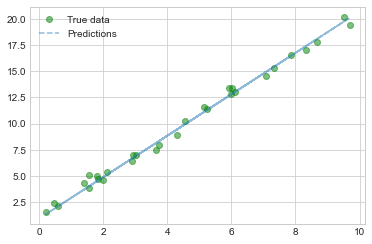

In [329]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.clf()

plt.plot(x_values, y_values, 'go', label='True data', alpha=0.5) # disegno i punti originali
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5) # disegno la linea calcolata dalla rete neurale
plt.legend(loc='best')
plt.show()


Il modello ha correttamente individuato la relazione lineare tra la variabile dipendente e indipendente.

# Altro esempio più complesso

In quest'altro caso preleviamo i dati dal foglio csv. I dati sono relativi a quello delle vendite di case negli anni 2012/2013.

In [729]:
my_data = np.genfromtxt('data/realestate.csv', delimiter=',', names=True)

Prendiamo come esempio la distanza delle case rispetto alle stazioni di metro

In [730]:
x_data = np.array(my_data['X3_distance_to_the_nearest_MRT_station'], dtype=np.float32).reshape(-1, 1)
# X2_house_age, X3_distance_to_the_nearest_MRT_station, X4_number_of_convenience_stores
y_data = np.array(my_data['Y_house_price_of_unit_area'], dtype=np.float32).reshape(-1, 1)

In [731]:
# minmax scaling
Scala = 1
XMin = np.amin(x_data)
XMax = np.amax(x_data)
#x_data = ((x_data - XMin) / (XMax-XMin)) * Scala  

YMin = np.amin(y_data)
YMax = np.amax(y_data)
#y_data = ((y_data - YMin) / (YMax-YMin)) * Scala

# è necessario fare lo scaling dei dati di x e y in modo da evitare il gradient explosion
# senza fare lo scaling il loss và subito a nan dopo poche epoche
# per ulteriori info vedere il paragrafo Scaling più in basso

In [742]:
# divido il set di dati in due 
x_train, x_test = x_data[:332,:], x_data[332:,:]
y_train, y_test = y_data[:332,:], y_data[332:,:]

Vediamo il grafico che genera i dati

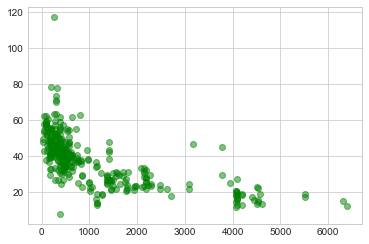

In [743]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5) # disegno i punti originali
plt.show()

In [784]:
inputDim = 1        # grandezza dimensione input x
outputDim = 1       # grandezza dimensione output y
#learningRate = 0.35  # 0.3
learningRate = 0.000000001
epochs = 2000        # 200

model2 = linearRegression(inputDim, outputDim) # istanzio la classe definita prima

# Initialize conv weights with Gaussian random values
#for m in model2.modules():
#    if isinstance(m, nn.Conv2d):
#        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#        m.weight.data.normal_(0, math.sqrt(2. / n))
        

In [785]:
criterion2 = torch.nn.MSELoss(reduction='mean') # Mean Squared Error , errore quadratico medio
optimizer2 = torch.optim.SGD(model2.parameters(), lr=learningRate) # Stochastic Gradient Descent , Discesa gradiente stocastico

In [786]:
LossStory = np.zeros((epochs))
#print('inputs {}, labels {}'.format(inputs, labels))

#for param in model2.parameters():
    #print('data {} of type {} and size {}'.format(param.data, type(param.data), param.size()))

for epoch in range(epochs):
    # Conversione di input ed etichette in Variabile
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    #------------------------------------------------------------------
    # Run a forward pass - eseguo il calcolo del modello
    #------------------------------------------------------------------    
    
    # Cancello i buffer dei gradienti
    optimizer2.zero_grad()

    # otteniamo l'output dal modello, dati gli input
    outputs = model2(inputs)

    # esempio calcolo del modello
    # a = 0.5193, b= -0.2992, x = 2175 , y' = 1129.1544 , y=32.1000 (sesta posizione)
    # y' = ax + b = 0.5193 * 2175 -0.2992 = 1129,1783
    # loss 730763.3125
    # 
    
    #------------------------------------------------------------------
    # Backpropagate - calcolo errore e aggiorno pesi
    #------------------------------------------------------------------    

    # testing
    # print ('model2 outputs ' + outputs)
    
    # otteniamo la perdita per l'output previsto
    loss = criterion2(outputs, labels)
    #print(loss) # stampiamo le perdite
    LossStory[epoch] = loss
    
    # otteniamo i gradienti rispetto ai parametri
    loss.backward()

    # update parametri
    optimizer2.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))
    
    #for param in model2.parameters():
        #print('data {} of type {} and size {}'.format(param.data, type(param.data), param.size()))


epoch 0, loss 861571.875
epoch 1, loss 851898.1875
epoch 2, loss 842333.5625
epoch 3, loss 832876.4375
epoch 4, loss 823525.5625
epoch 5, loss 814280.0
epoch 6, loss 805138.25
epoch 7, loss 796099.5625
epoch 8, loss 787162.1875
epoch 9, loss 778325.5625
epoch 10, loss 769588.25
epoch 11, loss 760949.0625
epoch 12, loss 752407.25
epoch 13, loss 743961.4375
epoch 14, loss 735610.625
epoch 15, loss 727353.75
epoch 16, loss 719189.5625
epoch 17, loss 711117.3125
epoch 18, loss 703135.8125
epoch 19, loss 695243.9375
epoch 20, loss 687440.875
epoch 21, loss 679725.5625
epoch 22, loss 672096.9375
epoch 23, loss 664554.1875
epoch 24, loss 657096.3125
epoch 25, loss 649722.1875
epoch 26, loss 642431.0625
epoch 27, loss 635222.0
epoch 28, loss 628093.8125
epoch 29, loss 621045.875
epoch 30, loss 614077.25
epoch 31, loss 607186.9375
epoch 32, loss 600374.1875
epoch 33, loss 593637.9375
epoch 34, loss 586977.375
epoch 35, loss 580391.9375
epoch 36, loss 573880.4375
epoch 37, loss 567442.1875
epoch

epoch 294, loss 32301.29296875
epoch 295, loss 31953.265625
epoch 296, loss 31609.150390625
epoch 297, loss 31268.90625
epoch 298, loss 30932.490234375
epoch 299, loss 30599.859375
epoch 300, loss 30270.9609375
epoch 301, loss 29945.765625
epoch 302, loss 29624.228515625
epoch 303, loss 29306.3046875
epoch 304, loss 28991.95703125
epoch 305, loss 28681.140625
epoch 306, loss 28373.826171875
epoch 307, loss 28069.962890625
epoch 308, loss 27769.5234375
epoch 309, loss 27472.45703125
epoch 310, loss 27178.732421875
epoch 311, loss 26888.310546875
epoch 312, loss 26601.154296875
epoch 313, loss 26317.2265625
epoch 314, loss 26036.490234375
epoch 315, loss 25758.916015625
epoch 316, loss 25484.45703125
epoch 317, loss 25213.087890625
epoch 318, loss 24944.771484375
epoch 319, loss 24679.470703125
epoch 320, loss 24417.154296875
epoch 321, loss 24157.7890625
epoch 322, loss 23901.337890625
epoch 323, loss 23647.7734375
epoch 324, loss 23397.056640625
epoch 325, loss 23149.162109375
epoch 32

epoch 574, loss 2657.22509765625
epoch 575, loss 2642.556396484375
epoch 576, loss 2628.05224609375
epoch 577, loss 2613.7109375
epoch 578, loss 2599.531005859375
epoch 579, loss 2585.5107421875
epoch 580, loss 2571.64794921875
epoch 581, loss 2557.941162109375
epoch 582, loss 2544.388671875
epoch 583, loss 2530.98828125
epoch 584, loss 2517.73876953125
epoch 585, loss 2504.63818359375
epoch 586, loss 2491.684814453125
epoch 587, loss 2478.876953125
epoch 588, loss 2466.213623046875
epoch 589, loss 2453.69287109375
epoch 590, loss 2441.3125
epoch 591, loss 2429.071533203125
epoch 592, loss 2416.968017578125
epoch 593, loss 2405.000732421875
epoch 594, loss 2393.168212890625
epoch 595, loss 2381.46826171875
epoch 596, loss 2369.900390625
epoch 597, loss 2358.4619140625
epoch 598, loss 2347.15234375
epoch 599, loss 2335.970458984375
epoch 600, loss 2324.91357421875
epoch 601, loss 2313.9814453125
epoch 602, loss 2303.17236328125
epoch 603, loss 2292.48486328125
epoch 604, loss 2281.91723

epoch 835, loss 1420.927734375
epoch 836, loss 1420.1611328125
epoch 837, loss 1419.4033203125
epoch 838, loss 1418.6539306640625
epoch 839, loss 1417.912841796875
epoch 840, loss 1417.1802978515625
epoch 841, loss 1416.4559326171875
epoch 842, loss 1415.73974609375
epoch 843, loss 1415.03173828125
epoch 844, loss 1414.3314208984375
epoch 845, loss 1413.63916015625
epoch 846, loss 1412.954345703125
epoch 847, loss 1412.2777099609375
epoch 848, loss 1411.6083984375
epoch 849, loss 1410.94677734375
epoch 850, loss 1410.29248046875
epoch 851, loss 1409.6453857421875
epoch 852, loss 1409.005859375
epoch 853, loss 1408.3734130859375
epoch 854, loss 1407.7481689453125
epoch 855, loss 1407.1298828125
epoch 856, loss 1406.5184326171875
epoch 857, loss 1405.9141845703125
epoch 858, loss 1405.31640625
epoch 859, loss 1404.7254638671875
epoch 860, loss 1404.14111328125
epoch 861, loss 1403.5633544921875
epoch 862, loss 1402.9921875
epoch 863, loss 1402.4273681640625
epoch 864, loss 1401.869018554

epoch 1078, loss 1357.1312255859375
epoch 1079, loss 1357.0819091796875
epoch 1080, loss 1357.0335693359375
epoch 1081, loss 1356.9853515625
epoch 1082, loss 1356.93798828125
epoch 1083, loss 1356.8909912109375
epoch 1084, loss 1356.8446044921875
epoch 1085, loss 1356.7987060546875
epoch 1086, loss 1356.7532958984375
epoch 1087, loss 1356.70849609375
epoch 1088, loss 1356.6641845703125
epoch 1089, loss 1356.6202392578125
epoch 1090, loss 1356.5770263671875
epoch 1091, loss 1356.5340576171875
epoch 1092, loss 1356.49169921875
epoch 1093, loss 1356.44970703125
epoch 1094, loss 1356.408447265625
epoch 1095, loss 1356.367431640625
epoch 1096, loss 1356.3270263671875
epoch 1097, loss 1356.286865234375
epoch 1098, loss 1356.247314453125
epoch 1099, loss 1356.2080078125
epoch 1100, loss 1356.1693115234375
epoch 1101, loss 1356.1309814453125
epoch 1102, loss 1356.0931396484375
epoch 1103, loss 1356.0556640625
epoch 1104, loss 1356.0186767578125
epoch 1105, loss 1355.9820556640625
epoch 1106, l

epoch 1342, loss 1352.9849853515625
epoch 1343, loss 1352.9825439453125
epoch 1344, loss 1352.9801025390625
epoch 1345, loss 1352.9775390625
epoch 1346, loss 1352.975341796875
epoch 1347, loss 1352.97265625
epoch 1348, loss 1352.9705810546875
epoch 1349, loss 1352.9681396484375
epoch 1350, loss 1352.9659423828125
epoch 1351, loss 1352.963623046875
epoch 1352, loss 1352.96142578125
epoch 1353, loss 1352.9591064453125
epoch 1354, loss 1352.95703125
epoch 1355, loss 1352.954833984375
epoch 1356, loss 1352.9525146484375
epoch 1357, loss 1352.950439453125
epoch 1358, loss 1352.9483642578125
epoch 1359, loss 1352.9462890625
epoch 1360, loss 1352.9443359375
epoch 1361, loss 1352.9422607421875
epoch 1362, loss 1352.940185546875
epoch 1363, loss 1352.9383544921875
epoch 1364, loss 1352.9364013671875
epoch 1365, loss 1352.9344482421875
epoch 1366, loss 1352.9326171875
epoch 1367, loss 1352.9306640625
epoch 1368, loss 1352.9287109375
epoch 1369, loss 1352.9267578125
epoch 1370, loss 1352.92504882

epoch 1601, loss 1352.775390625
epoch 1602, loss 1352.7752685546875
epoch 1603, loss 1352.7752685546875
epoch 1604, loss 1352.775146484375
epoch 1605, loss 1352.77490234375
epoch 1606, loss 1352.774658203125
epoch 1607, loss 1352.7747802734375
epoch 1608, loss 1352.7744140625
epoch 1609, loss 1352.7744140625
epoch 1610, loss 1352.7742919921875
epoch 1611, loss 1352.7740478515625
epoch 1612, loss 1352.7740478515625
epoch 1613, loss 1352.77392578125
epoch 1614, loss 1352.7738037109375
epoch 1615, loss 1352.773681640625
epoch 1616, loss 1352.7734375
epoch 1617, loss 1352.7733154296875
epoch 1618, loss 1352.7733154296875
epoch 1619, loss 1352.773193359375
epoch 1620, loss 1352.773193359375
epoch 1621, loss 1352.7730712890625
epoch 1622, loss 1352.7728271484375
epoch 1623, loss 1352.7728271484375
epoch 1624, loss 1352.7725830078125
epoch 1625, loss 1352.7724609375
epoch 1626, loss 1352.7724609375
epoch 1627, loss 1352.7724609375
epoch 1628, loss 1352.772216796875
epoch 1629, loss 1352.77221

epoch 1865, loss 1352.763427734375
epoch 1866, loss 1352.7633056640625
epoch 1867, loss 1352.7633056640625
epoch 1868, loss 1352.7633056640625
epoch 1869, loss 1352.7633056640625
epoch 1870, loss 1352.7633056640625
epoch 1871, loss 1352.7633056640625
epoch 1872, loss 1352.763427734375
epoch 1873, loss 1352.7633056640625
epoch 1874, loss 1352.7633056640625
epoch 1875, loss 1352.7633056640625
epoch 1876, loss 1352.7633056640625
epoch 1877, loss 1352.76318359375
epoch 1878, loss 1352.76318359375
epoch 1879, loss 1352.7633056640625
epoch 1880, loss 1352.7633056640625
epoch 1881, loss 1352.7633056640625
epoch 1882, loss 1352.76318359375
epoch 1883, loss 1352.76318359375
epoch 1884, loss 1352.76318359375
epoch 1885, loss 1352.7633056640625
epoch 1886, loss 1352.7633056640625
epoch 1887, loss 1352.7630615234375
epoch 1888, loss 1352.76318359375
epoch 1889, loss 1352.7633056640625
epoch 1890, loss 1352.76318359375
epoch 1891, loss 1352.76318359375
epoch 1892, loss 1352.7630615234375
epoch 1893

Vediamo il grafico del loss. Per avere una scala dell'asse y accettabile tolgo i primi valori.

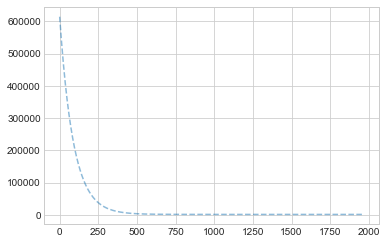

In [787]:
# tolgo i primi 30 valori per visualizzare meglio il grafico 
numPos = epochs-30 # numero ultime posizioni da visualizzare
ZoomOnLastNumber = LossStory[(epochs-numPos):]  # prelevo solo l'ultima parte
plt.clf()
plt.plot(range(numPos), ZoomOnLastNumber, '--', alpha=0.5) 
plt.show()

Mostro solo l'ultima parte del grafico in modo da mostrare se è stato trovato il punto di minimo

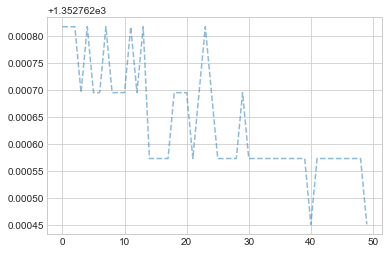

In [788]:
numPos = 50  # visualizzo le ultime 50 posizioni
ZoomOnLastNumber = LossStory[(epochs-numPos):]
plt.clf()
plt.plot(range(numPos), ZoomOnLastNumber, '--', alpha=0.5) 
plt.show()

### Testiamo il modello

In [789]:
with torch.no_grad(): # non abbiamo bisogno dei gradienti in fase di test
    #predicted = model2(Variable(torch.from_numpy(x_test))).data.numpy()
    predicted = model2(Variable(torch.from_numpy(x_train))).data.numpy()
    #print(predicted)

In [790]:
# calcolo l'accuratezza
#net = net.eval()  # set eval mode
#acc = torch.accuracy(model2, x_test, y_test, 0.15)
#print("Accuracy on test data = %0.2f%%" % acc)

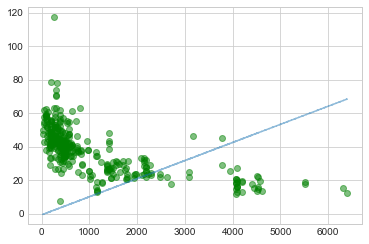

In [791]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5) # disegno i punti originali
#plt.plot(x_test, predicted, '--', label='Predictions', alpha=0.5) # disegno la linea calcolata dalla rete neurale
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.show()

### Nota importante sulla relazione tra scaling, convergenza e learningRate

Rispetto all'esercizio precedente è stato effettuato uno scaling delle features. 

Questo perchè se le features sono troppo grandi (valori delle features nell'ordine delle decine o delle centinaia) e il plot dei dati non è 'pulito' la SGD tende a esplodere e ad andare a infinito. 

Per provarlo basta commentare lo scaling di x_data e y_data e notare che dopo poche epoch il loss và subito a infinito e poi a nan.

Per scalare è stato scelto il metodo del minmax scaling. 

E stato necessario aumentare il learningRate a 0.3 e le epochs a 200. 
Si è reso necessario aggiustare il learningRate per lo scaling effettuato, perchè la funzione scelta per determinare il loss è la MSELoss ovvero la Mean Squared Error (errore quadratico medio). Dato che il quadrato di numeri piccoli sono numeri piccolissimi si è reso necessario aumentare il learningRate.
Per lo stesso motivo ho aumentato le epochs. Si potrebbe aumentare solo uno dei due hyperparametri (learningRate o epochs) ma questo avrebbe avuto dei problemi collaterali.
Aumentando solo il learningRate la funzione avrebbe potuto non convergere, mentre aumentando solo le epochs avremmo aumentato inutilmente il tempo di computazione.

In realtà avremmo potuto scegliere anche una terza strada, ovvero aumentare la scala delle features da [0..1] a [0..10]. Questo avrebbe permesso ai numeri di convergere più velocemente verso il loss minimo senza variare molto il learningRate e le epochs. 

Per provare questa strada è possibile usare la variabile Scala attualmente posta a 1.

**Lo scaling, la convergenza e il learningRate sono strettamente collegati tra loro**


Gli algoritmi influenzati molto dallo scaling sono :
- k-nearest neighbors
- Principal Component Analysis(PCA)
- Algoritmi che usano il gradient descent
- Tree based models
- Linear Discriminant Analysis(LDA)


### Scaling dei dati

Come abbiamo visto in precedenza, è necessario fare lo scaling dei dati in modo da evitare il gradient explosion.
Senza fare lo scaling, il loss và subito a infinito e poi a nan dopo poche epoche.

Il gradient explosion accade con maggiore frequenza sulle regressioni perchè in realtà non ci sono layer che implentano la funzione sigmoide che in qualche modo limita i valori.

Nelle regressioni quando calcoliamo il loss usiamo il quadrato degli errori e quindi i numeri subito ingrandiscono perchè usiamo l'elevazione al quadrato.


## Multi Variable Regression

La regressione lineare vista finora agisce su una singola variabile in input x e solo nel caso la relazione tra input x e output y sia nella forma y = ax + b

Nel caso le varibili in input siano 2 o anche di più ci serve la regressione multi variabile

La maggior parte della teoria è simile alla teoria per la regressione lineare a variabile singola, ma sarà necessario ampliarla e generalizzarla per gestire più variabili

In precedenza abbiamo definito il nostro set di dati D come composto da molte coppie, dove m è il numero di esempi:

$\normalsize D=\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)})\}$

Ora riscriviamo il set di dati come vettori separati di dimensione $1xm$ :

$\normalsize D_{x}=[x^{(1)},x^{(2)},\cdots,x^{(m)}]$ <br>
$\normalsize D_{y}=[y^{(1)},y^{(2)},\cdots,y^{(m)}]$



Ma ora abbiamo bisogno che ciascun esempio $x^{(i)}$ contenga più numeri, ovvero uno per ogni variabile di input. <br> Supponiamo di avere **n variabili in input**. Il modo più semplice per scrivere tutte le $n$ variabili input per l'i-esimo caso è come vettore di forma $nx1$. Cioè

$\normalsize x^{(i)} = \begin{bmatrix} x_{1}^{(i)} \\ x_{2}^{(i)} \\ \vdots \\ x_{n}^{(i)} \end{bmatrix} $

la notazione $x_{j}^{(i)}$ denota la j-esima variabile di input nell' i-esimo esempio di dati

Quindi sostituendo le $\normalsize x^{(i)}$ con i relativi vettori in $D_{x}$ otteniamo la matrice $nxm$ :

$\normalsize D_{x}=
\begin{bmatrix}
x_{1}^{(1)} & x_{1}^{(2)} & \cdots & x_{1}^{(m)} \\
x_{2}^{(1)} & x_{2}^{(2)} & \cdots & x_{2}^{(m)} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n}^{(1)} & x_{n}^{(2)} & \cdots & x_{n}^{(m)} \\
\end{bmatrix}
$

Quindi ogni colonna di $\normalsize D_{x}$ rappresenta un singolo esempio di dati di input. <br>
Non abbiamo bisogno di cambiare nulla sul vettore $\normalsize D_{y}$, poiché abbiamo ancora solo 1 variabile di output


Nel caso precedente della regressione lineare a variabile singola la stima veniva effetuata sulla formula <br> 
$\normalsize y^{'} = ax+b$. 

Nel caso di regressione multi variabile la formula diventa : <br>
$\normalsize y^{'(i)} = a_{1}x^{(i)}_{1} + a_{2}x^{(i)}_{2} + \cdots + a_{n}x^{(i)}_{n} + b$

Se mettiamo tutte le variabili dipendenti in un vettore <br>
$\normalsize A = [ a_{1}, a_{2}, \cdots , a_{n} ]$ <br>

e ricordando che <br>

$\normalsize x^{(i)} = \begin{bmatrix} x_{1}^{(i)} \\ x_{2}^{(i)} \\ \vdots \\ x_{n}^{(i)} \end{bmatrix} $ <br>

possiamo riscrivere la $\normalsize y^{'(i)}$ come moltiplicazione tra matrici : <br>

$\normalsize y^{'(i)} = [ a_{1}, a_{2}, \cdots , a_{n} ] \begin{bmatrix} x_{1}^{(i)} \\ x_{2}^{(i)} \\ \vdots \\ x_{n}^{(i)} \end{bmatrix} + b$

o in forma più compatta :

$\normalsize y^{'(i)} = Ax^{(i)} + b$

esprimendo la formula come funzione e  otteniamo 

$\normalsize y^{'}(x,A,b) = Ax + b$ 

dove x è uno tra gli esempi di dati $\normalsizex^{(1)} \cdots x^{(n)}$

La definizione della funzione di perdita è più o meno la stessa di prima, l'unica differenza è che ora non passiamo a come valore ma A come vettore :

$\normalsize L(A,b) = \sum \limits _{i=1} ^{m} (y^{'}(x^{(i)},A,b)−y^{(i)})^2 = \sum \limits _{i=1} ^{m} (Ax^{(i)} + b −y^{(i)})^2$

Per minimizzare la funzione di perdita, usiamo lo stesso processo di prima, la discesa del gradiente.

## Esempio Multi Variable Regression

https://donaldpinckney.com/books/pytorch/book/ch2-linreg/2018-03-21-multi-variable.html

In [792]:
import pandas as pd
import torch.optim as optim

# First we load the entire CSV file into an m x 3
age_data = np.array(my_data['X2_house_age'], dtype=np.float32).reshape(-1, 1)
dist_data = np.array(my_data['X3_distance_to_the_nearest_MRT_station'], dtype=np.float32).reshape(-1, 1)
stores_data = np.array(my_data['X4_number_of_convenience_stores'], dtype=np.float32).reshape(-1, 1)
y_data = np.array(my_data['Y_house_price_of_unit_area'], dtype=np.float32).reshape(-1, 1)

# n variabili in input e m campioni
datanxm = np.hstack([age_data,dist_data,stores_data])

array([[ 32.     ,  84.87882,  10.     ],
       [ 19.5    , 306.5947 ,   9.     ],
       [ 13.3    , 561.9845 ,   5.     ],
       ...,
       [ 18.8    , 390.9696 ,   7.     ],
       [  8.1    , 104.8101 ,   5.     ],
       [  6.5    ,  90.45606,   9.     ]], dtype=float32)

In [797]:
# creo il tensore
D = torch.tensor(datanxm, dtype=torch.float)
C = torch.tensor(y_data, dtype=torch.float)

# set x with transposed D
x_dataset = D.t()

# set y with transposed C
y_dataset = C.t()

# And make a convenient variable to remember the number of input columns
n = 3

In [798]:

### Model definition ###

# First we define the trainable parameters A and b 
A = torch.randn((1, n), requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Then we define the prediction model
def model(x_input):
    return A.mm(x_input) + b


### Loss function definition ###

def loss(y_predicted, y_target):
    return ((y_predicted - y_target)**2).sum()



In [802]:
### Training the model ###

# Setup the optimizer object, so it optimizes a and b.
optimizer = optim.Adam([A, b], lr=0.2)

# Main optimization loop
for t in range(2000):
    # Set the gradients to 0.
    optimizer.zero_grad()
    # Compute the current predicted y's from x_dataset
    y_predicted = model(x_dataset)
    # See how far off the prediction is
    current_loss = loss(y_predicted, y_dataset)
    # Compute the gradient of the loss with respect to A and b.
    current_loss.backward()
    # Update A and b accordingly.
    optimizer.step()
    print(f"t = {t}, loss = {current_loss}, A = {A.detach().numpy()}, b = {b.item()}")

t = 0, loss = 35090.9375, A = [[-0.05299588  0.19461814  1.496262  ]], b = 42.78838348388672
t = 1, loss = 46499416.0, A = [[-0.20182301  0.04579099  1.3474349 ]], b = 42.639556884765625
t = 2, loss = 3063024.75, A = [[-0.3448398  -0.09729163  1.2045382 ]], b = 42.496543884277344
t = 3, loss = 9896846.0, A = [[-0.40419877 -0.15688816  1.1456122 ]], b = 42.43719482421875
t = 4, loss = 26795594.0, A = [[-0.38486162 -0.13781998  1.1654394 ]], b = 42.45654296875
t = 5, loss = 20488666.0, A = [[-0.32403663 -0.07725163  1.2267323 ]], b = 42.51737976074219
t = 6, loss = 6069663.0, A = [[-0.24884129 -0.00231747  1.3024054 ]], b = 42.592586517333984
t = 7, loss = 45023.2421875, A = [[-0.18343194  0.06280638  1.36834   ]], b = 42.65801239013672
t = 8, loss = 5421846.0, A = [[-0.14758758  0.09834073  1.4047593 ]], b = 42.693878173828125
t = 9, loss = 12517830.0, A = [[-0.14716871  0.09844418  1.4057673 ]], b = 42.69432067871094
t = 10, loss = 12543530.0, A = [[-0.1753732   0.06993058  1.3781441 ]

t = 131, loss = 35105.16796875, A = [[-0.24760331 -0.00510524  1.3341291 ]], b = 42.61637878417969
t = 132, loss = 35141.98828125, A = [[-0.24763402 -0.00511744  1.3341483 ]], b = 42.616573333740234
t = 133, loss = 35136.546875, A = [[-0.24777026 -0.00523548  1.3340603 ]], b = 42.616661071777344
t = 134, loss = 35101.953125, A = [[-0.24793364 -0.00538098  1.3339435 ]], b = 42.616722106933594
t = 135, loss = 35103.9453125, A = [[-0.24803676 -0.00546657  1.3338853 ]], b = 42.616844177246094
t = 136, loss = 35128.1328125, A = [[-0.24803507 -0.00544771  1.3339304 ]], b = 42.61707305908203
t = 137, loss = 35121.33203125, A = [[-0.24794936 -0.00534518  1.3340579 ]], b = 42.61738586425781
t = 138, loss = 35098.87109375, A = [[-0.24784786 -0.00522722  1.3341998 ]], b = 42.617713928222656
t = 139, loss = 35103.265625, A = [[-0.24780181 -0.0051651   1.3342848 ]], b = 42.617984771728516
t = 140, loss = 35118.5859375, A = [[-0.24784294 -0.00519052  1.3342812 ]], b = 42.61817169189453
t = 141, loss

t = 227, loss = 35096.07421875, A = [[-0.24858072 -0.00530503  1.3334624 ]], b = 42.63824462890625
t = 228, loss = 35096.0703125, A = [[-0.24858564 -0.00530626  1.3334366 ]], b = 42.63849639892578
t = 229, loss = 35096.0625, A = [[-0.24858959 -0.00530654  1.3334117 ]], b = 42.63874816894531
t = 230, loss = 35096.0546875, A = [[-0.24859248 -0.00530579  1.3333876 ]], b = 42.638999938964844
t = 231, loss = 35096.04296875, A = [[-0.24859504 -0.00530473  1.3333638 ]], b = 42.63925552368164
t = 232, loss = 35096.0390625, A = [[-0.24859819 -0.00530427  1.3333391 ]], b = 42.63951110839844
t = 233, loss = 35096.03125, A = [[-0.24860227 -0.00530475  1.3333133 ]], b = 42.63976287841797
t = 234, loss = 35096.0234375, A = [[-0.24860686 -0.00530574  1.333287  ]], b = 42.6400146484375
t = 235, loss = 35096.01171875, A = [[-0.24861115 -0.00530647  1.3332608 ]], b = 42.6402702331543
t = 236, loss = 35096.00390625, A = [[-0.24861465 -0.00530641  1.3332353 ]], b = 42.640525817871094
t = 237, loss = 35095

t = 315, loss = 35095.390625, A = [[-0.24888779 -0.00531023  1.3309989 ]], b = 42.66179275512695
t = 316, loss = 35095.3828125, A = [[-0.24889134 -0.0053103   1.3309689 ]], b = 42.66207504272461
t = 317, loss = 35095.37109375, A = [[-0.2488949  -0.00531037  1.3309388 ]], b = 42.662357330322266
t = 318, loss = 35095.359375, A = [[-0.24889846 -0.00531043  1.3309088 ]], b = 42.66263961791992
t = 319, loss = 35095.3515625, A = [[-0.24890201 -0.00531049  1.3308787 ]], b = 42.66292190551758
t = 320, loss = 35095.34765625, A = [[-0.24890555 -0.00531054  1.3308486 ]], b = 42.663204193115234
t = 321, loss = 35095.3359375, A = [[-0.24890912 -0.0053106   1.3308184 ]], b = 42.66348648071289
t = 322, loss = 35095.328125, A = [[-0.24891269 -0.00531067  1.3307883 ]], b = 42.66376876831055
t = 323, loss = 35095.32421875, A = [[-0.24891627 -0.00531074  1.3307581 ]], b = 42.6640510559082
t = 324, loss = 35095.3125, A = [[-0.24891984 -0.0053108   1.3307279 ]], b = 42.66433334350586
t = 325, loss = 35095.

t = 412, loss = 35094.625, A = [[-0.2492446  -0.00531644  1.3279803 ]], b = 42.6901741027832
t = 413, loss = 35094.61328125, A = [[-0.2492484 -0.0053165  1.3279482]], b = 42.69047546386719
t = 414, loss = 35094.609375, A = [[-0.2492522  -0.00531657  1.3279161 ]], b = 42.69077682495117
t = 415, loss = 35094.59765625, A = [[-0.24925601 -0.00531663  1.3278841 ]], b = 42.691078186035156
t = 416, loss = 35094.59375, A = [[-0.24925983 -0.0053167   1.327852  ]], b = 42.69137954711914
t = 417, loss = 35094.58203125, A = [[-0.24926364 -0.00531676  1.3278198 ]], b = 42.691680908203125
t = 418, loss = 35094.57421875, A = [[-0.24926746 -0.00531683  1.3277876 ]], b = 42.69198226928711
t = 419, loss = 35094.5703125, A = [[-0.24927127 -0.00531689  1.3277555 ]], b = 42.692283630371094
t = 420, loss = 35094.5625, A = [[-0.24927509 -0.00531696  1.3277233 ]], b = 42.69258499145508
t = 421, loss = 35094.55078125, A = [[-0.2492789  -0.00531703  1.3276911 ]], b = 42.69288635253906
t = 422, loss = 35094.5429

t = 496, loss = 35093.9921875, A = [[-0.24956739 -0.00532204  1.3252527 ]], b = 42.715824127197266
t = 497, loss = 35093.984375, A = [[-0.24957132 -0.0053221   1.3252198 ]], b = 42.71613311767578
t = 498, loss = 35093.98046875, A = [[-0.24957526 -0.00532217  1.3251868 ]], b = 42.7164421081543
t = 499, loss = 35093.97265625, A = [[-0.24957918 -0.00532224  1.325154  ]], b = 42.71675109863281
t = 500, loss = 35093.9609375, A = [[-0.2495831 -0.0053223  1.325121 ]], b = 42.71706008911133
t = 501, loss = 35093.95703125, A = [[-0.24958701 -0.00532237  1.3250881 ]], b = 42.717369079589844
t = 502, loss = 35093.953125, A = [[-0.24959092 -0.00532244  1.3250552 ]], b = 42.71767807006836
t = 503, loss = 35093.94140625, A = [[-0.24959482 -0.00532251  1.3250223 ]], b = 42.717987060546875
t = 504, loss = 35093.93359375, A = [[-0.24959873 -0.00532257  1.3249894 ]], b = 42.71829605102539
t = 505, loss = 35093.92578125, A = [[-0.24960262 -0.00532264  1.3249565 ]], b = 42.718605041503906
t = 506, loss = 

t = 583, loss = 35093.3984375, A = [[-0.24990565 -0.00532791  1.3223945 ]], b = 42.742706298828125
t = 584, loss = 35093.390625, A = [[-0.24990954 -0.00532797  1.3223617 ]], b = 42.743011474609375
t = 585, loss = 35093.3828125, A = [[-0.24991342 -0.00532804  1.3223289 ]], b = 42.743316650390625
t = 586, loss = 35093.37890625, A = [[-0.24991731 -0.0053281   1.3222961 ]], b = 42.743621826171875
t = 587, loss = 35093.3671875, A = [[-0.24992119 -0.00532817  1.3222634 ]], b = 42.743927001953125
t = 588, loss = 35093.36328125, A = [[-0.24992506 -0.00532824  1.3222306 ]], b = 42.744232177734375
t = 589, loss = 35093.35546875, A = [[-0.24992894 -0.0053283   1.3221978 ]], b = 42.744537353515625
t = 590, loss = 35093.35546875, A = [[-0.2499328  -0.00532837  1.3221651 ]], b = 42.744842529296875
t = 591, loss = 35093.34375, A = [[-0.24993664 -0.00532843  1.3221325 ]], b = 42.745147705078125
t = 592, loss = 35093.33984375, A = [[-0.24994047 -0.0053285   1.3220998 ]], b = 42.745452880859375
t = 593,

t = 673, loss = 35092.859375, A = [[-0.250249   -0.00533387  1.3194876 ]], b = 42.770023345947266
t = 674, loss = 35092.8515625, A = [[-0.2502528  -0.00533393  1.3194556 ]], b = 42.770320892333984
t = 675, loss = 35092.84375, A = [[-0.25025663 -0.005334    1.3194237 ]], b = 42.7706184387207
t = 676, loss = 35092.84375, A = [[-0.2502604  -0.00533406  1.3193917 ]], b = 42.77091598510742
t = 677, loss = 35092.83203125, A = [[-0.2502642  -0.00533413  1.3193599 ]], b = 42.77121353149414
t = 678, loss = 35092.828125, A = [[-0.25026798 -0.00533419  1.3193281 ]], b = 42.77151107788086
t = 679, loss = 35092.82421875, A = [[-0.25027174 -0.00533426  1.3192962 ]], b = 42.77180862426758
t = 680, loss = 35092.81640625, A = [[-0.2502755  -0.00533432  1.3192645 ]], b = 42.7721061706543
t = 681, loss = 35092.81640625, A = [[-0.25027925 -0.00533439  1.3192328 ]], b = 42.772403717041016
t = 682, loss = 35092.80859375, A = [[-0.25028297 -0.00533445  1.3192011 ]], b = 42.772701263427734
t = 683, loss = 350

t = 768, loss = 35092.375, A = [[-0.2505983  -0.00533994  1.3165332 ]], b = 42.79779815673828
t = 769, loss = 35092.37109375, A = [[-0.2506019 -0.00534    1.3165029]], b = 42.7980842590332
t = 770, loss = 35092.3671875, A = [[-0.25060546 -0.00534006  1.3164726 ]], b = 42.798370361328125
t = 771, loss = 35092.36328125, A = [[-0.25060904 -0.00534012  1.3164424 ]], b = 42.79865264892578
t = 772, loss = 35092.359375, A = [[-0.25061262 -0.00534019  1.3164121 ]], b = 42.79893493652344
t = 773, loss = 35092.35546875, A = [[-0.2506162  -0.00534024  1.3163819 ]], b = 42.799217224121094
t = 774, loss = 35092.34765625, A = [[-0.25061977 -0.00534031  1.3163518 ]], b = 42.79949951171875
t = 775, loss = 35092.34375, A = [[-0.25062335 -0.00534037  1.3163216 ]], b = 42.799781799316406
t = 776, loss = 35092.33984375, A = [[-0.25062692 -0.00534043  1.3162915 ]], b = 42.80006408691406
t = 777, loss = 35092.3359375, A = [[-0.25063047 -0.00534049  1.3162613 ]], b = 42.80034637451172
t = 778, loss = 35092.3

t = 856, loss = 35092.0078125, A = [[-0.2509038  -0.00534524  1.3139501 ]], b = 42.822078704833984
t = 857, loss = 35092.0078125, A = [[-0.25090712 -0.0053453   1.3139217 ]], b = 42.82234573364258
t = 858, loss = 35092.00390625, A = [[-0.25091046 -0.00534535  1.3138934 ]], b = 42.82261276245117
t = 859, loss = 35092.0, A = [[-0.2509138  -0.00534541  1.3138652 ]], b = 42.822879791259766
t = 860, loss = 35091.99609375, A = [[-0.25091714 -0.00534547  1.3138369 ]], b = 42.82314682006836
t = 861, loss = 35091.9921875, A = [[-0.25092047 -0.00534553  1.3138087 ]], b = 42.82341384887695
t = 862, loss = 35091.9921875, A = [[-0.2509238  -0.00534559  1.3137804 ]], b = 42.82368087768555
t = 863, loss = 35091.98828125, A = [[-0.25092715 -0.00534565  1.3137522 ]], b = 42.82394790649414
t = 864, loss = 35091.98046875, A = [[-0.2509305  -0.00534571  1.3137239 ]], b = 42.82421112060547
t = 865, loss = 35091.98046875, A = [[-0.25093383 -0.00534576  1.3136958 ]], b = 42.8244743347168
t = 866, loss = 3509

t = 943, loss = 35091.72265625, A = [[-0.25118452 -0.00535011  1.3115758 ]], b = 42.84440994262695
t = 944, loss = 35091.71875, A = [[-0.25118762 -0.00535017  1.3115495 ]], b = 42.84465408325195
t = 945, loss = 35091.71875, A = [[-0.25119072 -0.00535022  1.3115234 ]], b = 42.84489822387695
t = 946, loss = 35091.71484375, A = [[-0.25119382 -0.00535027  1.3114973 ]], b = 42.84514236450195
t = 947, loss = 35091.71484375, A = [[-0.25119692 -0.00535033  1.3114712 ]], b = 42.84538650512695
t = 948, loss = 35091.7109375, A = [[-0.25120002 -0.00535038  1.3114451 ]], b = 42.84563064575195
t = 949, loss = 35091.70703125, A = [[-0.2512031  -0.00535043  1.3114191 ]], b = 42.84587478637695
t = 950, loss = 35091.703125, A = [[-0.25120616 -0.00535049  1.3113931 ]], b = 42.84611892700195
t = 951, loss = 35091.703125, A = [[-0.25120923 -0.00535054  1.3113672 ]], b = 42.84636306762695
t = 952, loss = 35091.69921875, A = [[-0.2512123  -0.00535059  1.3113412 ]], b = 42.84660720825195
t = 953, loss = 35091

t = 1038, loss = 35091.48046875, A = [[-0.25146392 -0.00535496  1.309213  ]], b = 42.866615295410156
t = 1039, loss = 35091.48046875, A = [[-0.2514667  -0.00535501  1.3091896 ]], b = 42.86683654785156
t = 1040, loss = 35091.4765625, A = [[-0.25146946 -0.00535506  1.3091661 ]], b = 42.86705780029297
t = 1041, loss = 35091.47265625, A = [[-0.25147223 -0.00535511  1.3091426 ]], b = 42.867279052734375
t = 1042, loss = 35091.46875, A = [[-0.251475   -0.00535516  1.3091192 ]], b = 42.86750030517578
t = 1043, loss = 35091.46875, A = [[-0.25147778 -0.0053552   1.3090959 ]], b = 42.86772155761719
t = 1044, loss = 35091.46484375, A = [[-0.25148055 -0.00535525  1.3090725 ]], b = 42.867942810058594
t = 1045, loss = 35091.46875, A = [[-0.25148332 -0.0053553   1.3090491 ]], b = 42.8681640625
t = 1046, loss = 35091.4609375, A = [[-0.2514861  -0.00535535  1.3090258 ]], b = 42.86838150024414
t = 1047, loss = 35091.4609375, A = [[-0.25148886 -0.0053554   1.3090025 ]], b = 42.86859893798828
t = 1048, los

t = 1133, loss = 35091.3046875, A = [[-0.25171307 -0.00535929  1.3071067 ]], b = 42.88642120361328
t = 1134, loss = 35091.30078125, A = [[-0.2517155  -0.00535933  1.307086  ]], b = 42.88661575317383
t = 1135, loss = 35091.296875, A = [[-0.25171795 -0.00535937  1.3070652 ]], b = 42.886810302734375
t = 1136, loss = 35091.296875, A = [[-0.2517204  -0.00535941  1.3070445 ]], b = 42.88700485229492
t = 1137, loss = 35091.30078125, A = [[-0.25172284 -0.00535946  1.3070239 ]], b = 42.88719940185547
t = 1138, loss = 35091.296875, A = [[-0.25172526 -0.0053595   1.3070033 ]], b = 42.887393951416016
t = 1139, loss = 35091.29296875, A = [[-0.25172767 -0.00535954  1.3069826 ]], b = 42.88758850097656
t = 1140, loss = 35091.2890625, A = [[-0.25173008 -0.00535959  1.306962  ]], b = 42.88778305053711
t = 1141, loss = 35091.28515625, A = [[-0.2517325  -0.00535963  1.3069415 ]], b = 42.887977600097656
t = 1142, loss = 35091.2890625, A = [[-0.2517349  -0.00535967  1.306921  ]], b = 42.8881721496582
t = 114

t = 1251, loss = 35091.1484375, A = [[-0.25197926 -0.00536391  1.3048551 ]], b = 42.907588958740234
t = 1252, loss = 35091.1484375, A = [[-0.25198132 -0.00536395  1.3048377 ]], b = 42.907752990722656
t = 1253, loss = 35091.1484375, A = [[-0.25198334 -0.00536398  1.3048204 ]], b = 42.90791702270508
t = 1254, loss = 35091.1484375, A = [[-0.25198537 -0.00536402  1.3048031 ]], b = 42.9080810546875
t = 1255, loss = 35091.14453125, A = [[-0.2519874  -0.00536405  1.3047858 ]], b = 42.90824508666992
t = 1256, loss = 35091.14453125, A = [[-0.25198942 -0.00536409  1.3047686 ]], b = 42.908409118652344
t = 1257, loss = 35091.14453125, A = [[-0.25199148 -0.00536413  1.3047513 ]], b = 42.9085693359375
t = 1258, loss = 35091.140625, A = [[-0.2519935  -0.00536416  1.3047341 ]], b = 42.908729553222656
t = 1259, loss = 35091.14453125, A = [[-0.25199553 -0.00536419  1.304717  ]], b = 42.90888977050781
t = 1260, loss = 35091.140625, A = [[-0.25199756 -0.00536423  1.3046998 ]], b = 42.90904998779297
t = 12

t = 1371, loss = 35091.0546875, A = [[-0.25220245 -0.00536778  1.3029684 ]], b = 42.925331115722656
t = 1372, loss = 35091.0546875, A = [[-0.2522041  -0.00536781  1.3029543 ]], b = 42.92546463012695
t = 1373, loss = 35091.0546875, A = [[-0.25220573 -0.00536784  1.3029402 ]], b = 42.92559814453125
t = 1374, loss = 35091.05078125, A = [[-0.25220737 -0.00536787  1.3029262 ]], b = 42.92573165893555
t = 1375, loss = 35091.05078125, A = [[-0.252209  -0.0053679  1.3029122]], b = 42.925865173339844
t = 1376, loss = 35091.05078125, A = [[-0.25221068 -0.00536793  1.3028983 ]], b = 42.925994873046875
t = 1377, loss = 35091.05078125, A = [[-0.25221232 -0.00536796  1.3028843 ]], b = 42.926124572753906
t = 1378, loss = 35091.05078125, A = [[-0.25221395 -0.00536798  1.3028704 ]], b = 42.92625427246094
t = 1379, loss = 35091.05078125, A = [[-0.25221562 -0.00536802  1.3028564 ]], b = 42.92638397216797
t = 1380, loss = 35091.04296875, A = [[-0.25221726 -0.00536804  1.3028425 ]], b = 42.926513671875
t = 

t = 1463, loss = 35091.0078125, A = [[-0.252343   -0.00537022  1.3017792 ]], b = 42.93650817871094
t = 1464, loss = 35091.0078125, A = [[-0.25234437 -0.00537025  1.3017675 ]], b = 42.93661880493164
t = 1465, loss = 35091.0078125, A = [[-0.25234574 -0.00537027  1.3017558 ]], b = 42.936729431152344
t = 1466, loss = 35091.00390625, A = [[-0.2523471 -0.0053703  1.3017441]], b = 42.93684005737305
t = 1467, loss = 35091.00390625, A = [[-0.25234848 -0.00537032  1.3017324 ]], b = 42.93695068359375
t = 1468, loss = 35091.00390625, A = [[-0.25234985 -0.00537035  1.3017209 ]], b = 42.93706130981445
t = 1469, loss = 35091.0078125, A = [[-0.25235122 -0.00537037  1.3017093 ]], b = 42.937171936035156
t = 1470, loss = 35091.00390625, A = [[-0.2523526 -0.0053704  1.3016977]], b = 42.93728256225586
t = 1471, loss = 35091.00390625, A = [[-0.25235397 -0.00537042  1.3016862 ]], b = 42.93739318847656
t = 1472, loss = 35091.0078125, A = [[-0.25235534 -0.00537044  1.3016746 ]], b = 42.937503814697266
t = 1473

t = 1560, loss = 35090.9765625, A = [[-0.25246504 -0.00537235  1.3007466 ]], b = 42.94622802734375
t = 1561, loss = 35090.9765625, A = [[-0.25246617 -0.00537237  1.300737  ]], b = 42.946319580078125
t = 1562, loss = 35090.97265625, A = [[-0.25246733 -0.00537239  1.3007274 ]], b = 42.946407318115234
t = 1563, loss = 35090.9765625, A = [[-0.2524685  -0.00537241  1.3007177 ]], b = 42.946495056152344
t = 1564, loss = 35090.97265625, A = [[-0.25246966 -0.00537243  1.3007082 ]], b = 42.94658279418945
t = 1565, loss = 35090.9765625, A = [[-0.25247082 -0.00537245  1.3006986 ]], b = 42.94667053222656
t = 1566, loss = 35090.9765625, A = [[-0.25247195 -0.00537246  1.3006891 ]], b = 42.94675827026367
t = 1567, loss = 35090.9765625, A = [[-0.2524731  -0.00537248  1.3006797 ]], b = 42.94684600830078
t = 1568, loss = 35090.97265625, A = [[-0.25247422 -0.0053725   1.3006703 ]], b = 42.94693374633789
t = 1569, loss = 35090.97265625, A = [[-0.25247532 -0.00537252  1.3006608 ]], b = 42.947021484375
t = 1

t = 1656, loss = 35090.95703125, A = [[-0.25256237 -0.00537404  1.2999235 ]], b = 42.95396041870117
t = 1657, loss = 35090.95703125, A = [[-0.25256324 -0.00537405  1.299916  ]], b = 42.95403289794922
t = 1658, loss = 35090.95703125, A = [[-0.2525641  -0.00537407  1.2999085 ]], b = 42.954105377197266
t = 1659, loss = 35090.953125, A = [[-0.252565   -0.00537409  1.299901  ]], b = 42.95417785644531
t = 1660, loss = 35090.953125, A = [[-0.2525659 -0.0053741  1.2998934]], b = 42.95425033569336
t = 1661, loss = 35090.953125, A = [[-0.2525668  -0.00537412  1.2998857 ]], b = 42.954322814941406
t = 1662, loss = 35090.95703125, A = [[-0.25256774 -0.00537413  1.2998781 ]], b = 42.95439529418945
t = 1663, loss = 35090.95703125, A = [[-0.2525687  -0.00537415  1.2998705 ]], b = 42.9544677734375
t = 1664, loss = 35090.95703125, A = [[-0.25256965 -0.00537416  1.2998629 ]], b = 42.95453643798828
t = 1665, loss = 35090.95703125, A = [[-0.2525706  -0.00537418  1.2998552 ]], b = 42.95460510253906
t = 1666

t = 1752, loss = 35090.9453125, A = [[-0.25263923 -0.00537538  1.2992723 ]], b = 42.960086822509766
t = 1753, loss = 35090.9453125, A = [[-0.25263998 -0.00537539  1.2992662 ]], b = 42.96014404296875
t = 1754, loss = 35090.9453125, A = [[-0.25264075 -0.0053754   1.2992601 ]], b = 42.960201263427734
t = 1755, loss = 35090.94921875, A = [[-0.25264153 -0.00537541  1.2992541 ]], b = 42.96025848388672
t = 1756, loss = 35090.9453125, A = [[-0.2526423  -0.00537542  1.299248  ]], b = 42.9603157043457
t = 1757, loss = 35090.9453125, A = [[-0.25264308 -0.00537544  1.2992419 ]], b = 42.96037292480469
t = 1758, loss = 35090.9453125, A = [[-0.25264385 -0.00537545  1.2992358 ]], b = 42.96043014526367
t = 1759, loss = 35090.9453125, A = [[-0.25264463 -0.00537546  1.2992297 ]], b = 42.96048355102539
t = 1760, loss = 35090.9453125, A = [[-0.25264537 -0.00537547  1.2992238 ]], b = 42.96053695678711
t = 1761, loss = 35090.9453125, A = [[-0.25264612 -0.00537548  1.2992178 ]], b = 42.96059036254883
t = 1762

t = 1847, loss = 35090.9375, A = [[-0.25269905 -0.0053764   1.2987701 ]], b = 42.96480178833008
t = 1848, loss = 35090.9375, A = [[-0.25269958 -0.00537641  1.2987654 ]], b = 42.96484375
t = 1849, loss = 35090.94140625, A = [[-0.2527001  -0.00537642  1.2987609 ]], b = 42.96488571166992
t = 1850, loss = 35090.93359375, A = [[-0.2527006  -0.00537643  1.2987564 ]], b = 42.964927673339844
t = 1851, loss = 35090.94140625, A = [[-0.25270107 -0.00537644  1.298752  ]], b = 42.964969635009766
t = 1852, loss = 35090.9375, A = [[-0.25270155 -0.00537645  1.2987475 ]], b = 42.96501159667969
t = 1853, loss = 35090.94140625, A = [[-0.25270203 -0.00537646  1.2987431 ]], b = 42.96505355834961
t = 1854, loss = 35090.94140625, A = [[-0.2527025  -0.00537647  1.2987387 ]], b = 42.96509552001953
t = 1855, loss = 35090.94140625, A = [[-0.25270298 -0.00537648  1.2987343 ]], b = 42.96513748168945
t = 1856, loss = 35090.94140625, A = [[-0.25270346 -0.00537649  1.2987299 ]], b = 42.965179443359375
t = 1857, loss 

t = 1945, loss = 35090.93359375, A = [[-0.25274545 -0.00537721  1.2983778 ]], b = 42.968502044677734
t = 1946, loss = 35090.9375, A = [[-0.2527459  -0.00537722  1.2983742 ]], b = 42.96853256225586
t = 1947, loss = 35090.93359375, A = [[-0.2527463  -0.00537722  1.2983706 ]], b = 42.968563079833984
t = 1948, loss = 35090.93359375, A = [[-0.25274673 -0.00537724  1.298367  ]], b = 42.96859359741211
t = 1949, loss = 35090.93359375, A = [[-0.25274712 -0.00537723  1.2983636 ]], b = 42.968624114990234
t = 1950, loss = 35090.9375, A = [[-0.2527475  -0.00537725  1.2983601 ]], b = 42.96865463256836
t = 1951, loss = 35090.93359375, A = [[-0.25274786 -0.00537724  1.2983568 ]], b = 42.968685150146484
t = 1952, loss = 35090.9375, A = [[-0.25274822 -0.00537726  1.2983534 ]], b = 42.96871566772461
t = 1953, loss = 35090.9375, A = [[-0.25274855 -0.00537726  1.2983502 ]], b = 42.968746185302734
t = 1954, loss = 35090.93359375, A = [[-0.25274888 -0.00537728  1.298347  ]], b = 42.96877670288086
t = 1955, l

# FastAi

Dato che linear regression è un algoritmo molto semplice non esiste nessuna implementazione nel framework FastAi